In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.linear_model import LogisticRegression

In [2]:
X_train, train_labels = loadlocal_mnist(
    images_path='MNIST/train-images.idx3-ubyte',
    labels_path='MNIST/train-labels.idx1-ubyte')
X_test, test_labels = loadlocal_mnist(
    images_path='MNIST/t10k-images.idx3-ubyte',
    labels_path='MNIST/t10k-labels.idx1-ubyte')    

In [13]:
X_train.shape

(60000, 784)

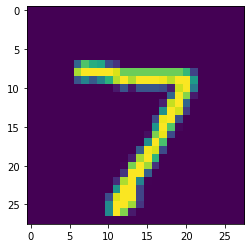

In [10]:
plt.imshow(np.reshape(X_test[0],(28,28)))  

In [5]:
LR = LogisticRegression()

In [6]:
LR.fit(X_train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

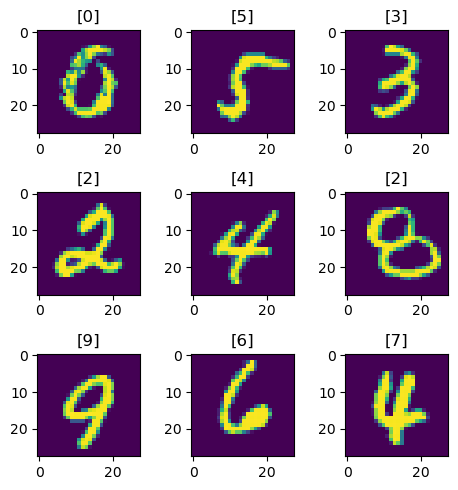

In [21]:
plt.figure(figsize = (5,5), dpi = 100)
for i in range(9):
    x = np.random.randint(0,len(X_test)-1)
    plt.subplot(3,3,i+1)
    y = LR.predict(X_test[x].reshape(1,-1))
    plt.imshow(np.reshape(X_test[x],(28,28)))
    plt.title(y)
    plt.tight_layout()
    

In [22]:
LR.score(X_train, train_labels)

0.9339166666666666

In [23]:
LR.score(X_test, test_labels)

0.9255

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [40]:
predicted_labels = LR.predict(X_train)


In [41]:
print(predicted_labels)

[5 0 4 ... 5 6 8]


In [44]:
cm = confusion_matrix(train_labels, predicted_labels)
print(cm)

[[5764    0   15    9   14   36   33   10   38    4]
 [   1 6584   32   19    6   20    3   10   55   12]
 [  28   47 5445   89   61   20   56   51  140   21]
 [  17   23  118 5582    6  162   14   50  119   40]
 [  13   22   23    9 5491    8   48   15   42  171]
 [  57   18   40  161   48 4793   82   15  160   47]
 [  34    9   40    0   35   58 5713    4   21    4]
 [  11   20   58   28   42    8    4 5896   20  178]
 [  27   93   55  122   19  136   36   18 5293   52]
 [  21   22   14   70  129   33    3  138   45 5474]]


Text(0.5, 1, 'Softmax Linear Regression For MNIST with Scikit Learn')

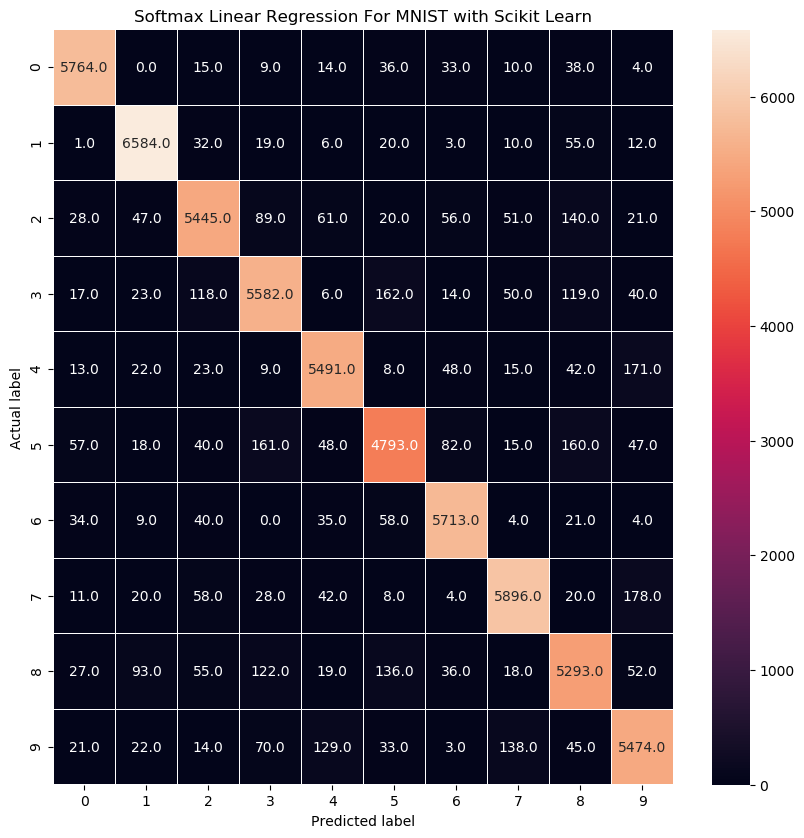

In [50]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=0.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrx for Softmax Linear Regression For MNIST with Scikit Learn')